In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [2]:
data=pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
pd.set_option('display.max_columns', None)
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
data.columns = [column.lower().replace(' ', '_') for column in data.columns]
data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
column_names = data.columns
print(column_names)


Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')


In [6]:
data['effective_to_date'] = pd.to_datetime(data['effective_to_date'])
data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [7]:
# # or other way 
# data['effective_to_date'] = data['effective_to_date'].dt.strftime('%m/%d/%Y')

In [8]:
numerical_df = data.select_dtypes(include=np.number)

In [9]:
def differenciate_variables(df):
   
    continuous_variables = []
    discrete_variables = []

    for column in df.columns:
        unique_values = set(df[column])
        if all(val % 1 == 0 for val in unique_values):
            discrete_variables.append(column)
        else:
            continuous_variables.append(column)

    continuous_df = df[continuous_variables]
    discrete_df = df[discrete_variables]

    return continuous_df, discrete_df

continuous_df, discrete_df = differenciate_variables(numerical_df)


print(continuous_df)


      customer_lifetime_value  total_claim_amount
0                 2763.519279          384.811147
1                 6979.535903         1131.464935
2                12887.431650          566.472247
3                 7645.861827          529.881344
4                 2813.692575          138.130879
...                       ...                 ...
9129             23405.987980          198.234764
9130              3096.511217          379.200000
9131              8163.890428          790.784983
9132              7524.442436          691.200000
9133              2611.836866          369.600000

[9134 rows x 2 columns]


In [10]:
print(discrete_df)

      income  monthly_premium_auto  months_since_last_claim  \
0      56274                    69                       32   
1          0                    94                       13   
2      48767                   108                       18   
3          0                   106                       18   
4      43836                    73                       12   
...      ...                   ...                      ...   
9129   71941                    73                       18   
9130   21604                    79                       14   
9131       0                    85                        9   
9132   21941                    96                       34   
9133       0                    77                        3   

      months_since_policy_inception  number_of_open_complaints  \
0                                 5                          0   
1                                42                          0   
2                                38          

<Axes: >

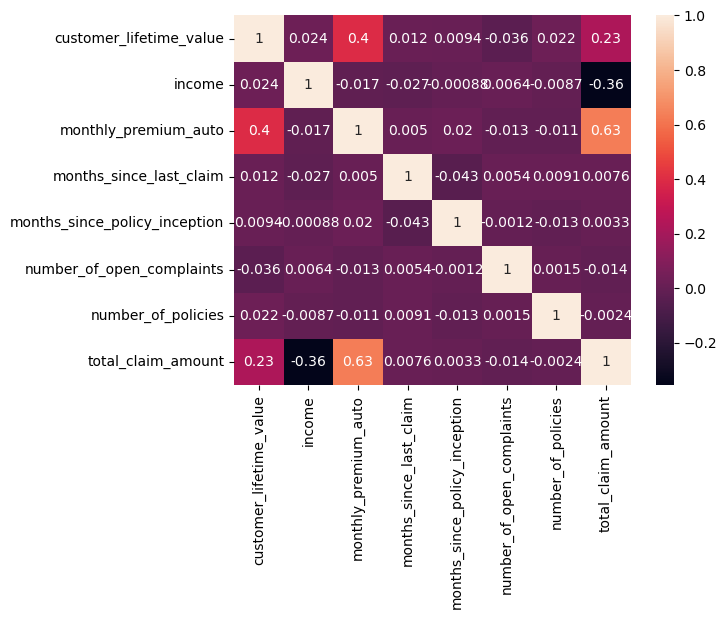

In [13]:
import seaborn as sns
corr_matrix = numerical_df .corr()
sns.heatmap(corr_matrix,annot=True)

In [14]:
# monthly_premium auto and customer_lifetime_value there have a big impact our target toal_claim_amount
#as well monthly premium auto and customer_lifetime_value is as well lightly correlated. 

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

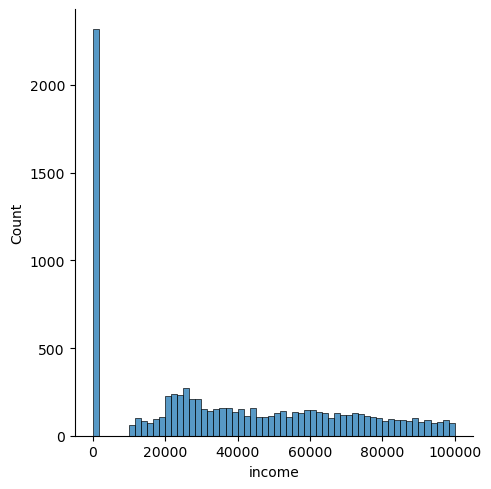

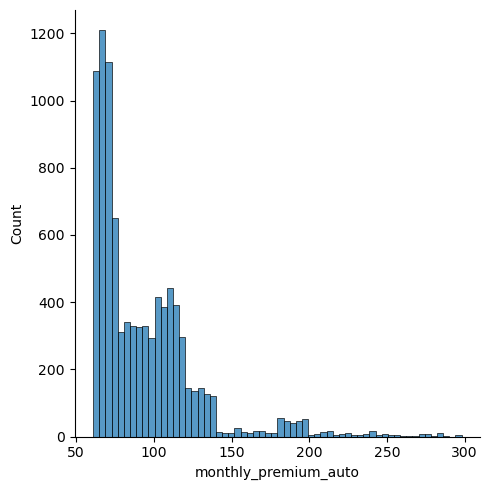

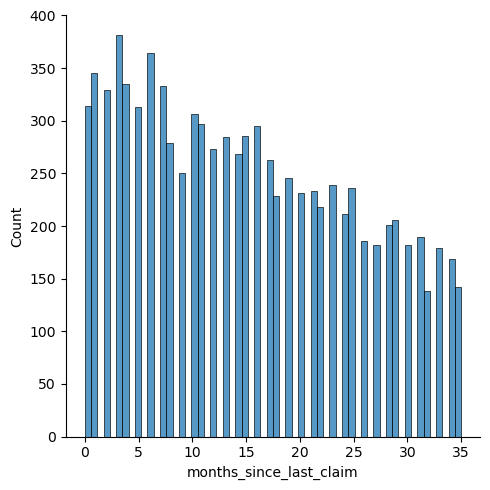

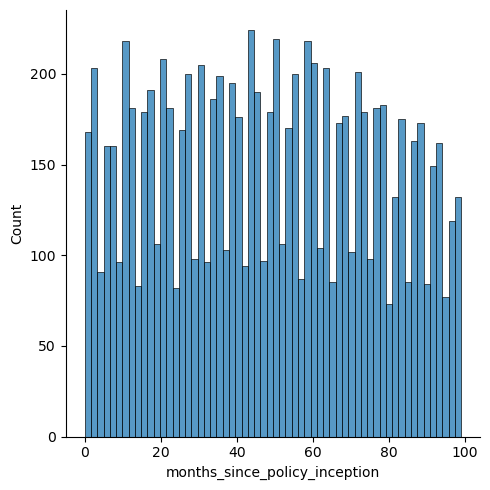

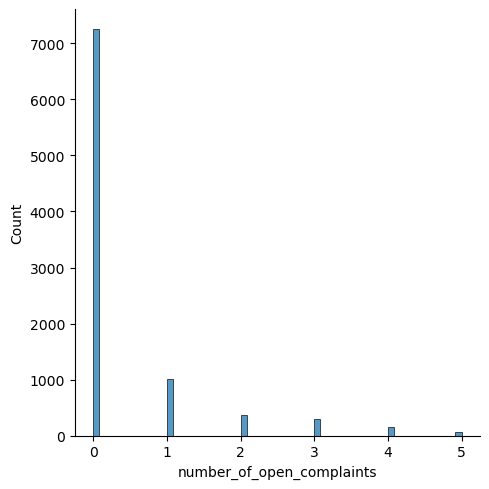

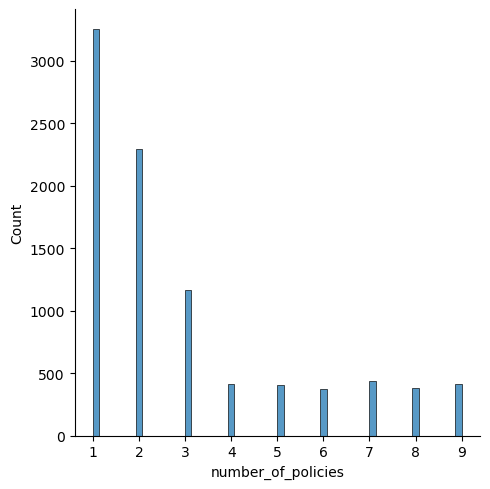

In [16]:
def discrete_displots (df):
   
    for column in df.columns:
        sns.displot(df[column], bins=60)
        plt.show()
        

discrete_displots(discrete_df)

In [17]:
# Any of the plots show a normal distribution rather logarithmic. Some outliers are present as well. 

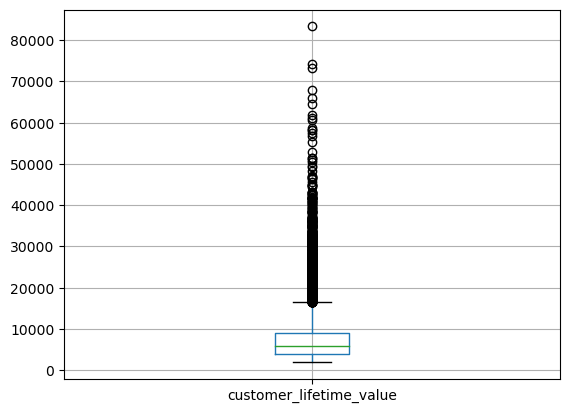

In [22]:
# data[['customer_lifetime_value', 'income', 'total_claim_amount']].boxplot()
data[['customer_lifetime_value']].boxplot()
plt.show()


<Axes: >

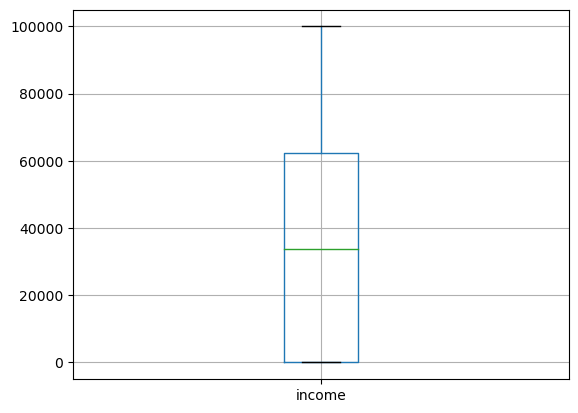

In [23]:
data[['income']].boxplot()

<Axes: >

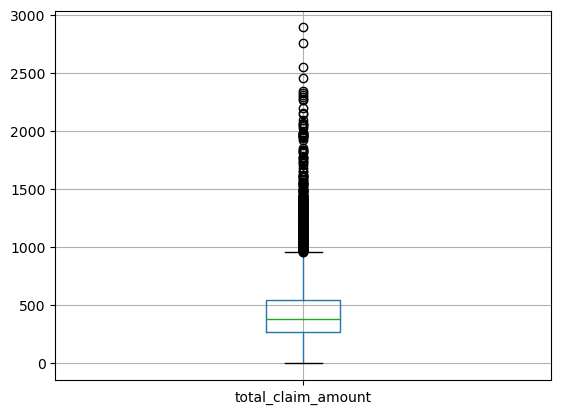

In [31]:
data[['total_claim_amount']].boxplot() #target

In [32]:
def outliers(column, threshold = 3):
   
    data = column[abs(column.apply(lambda x: (x - column.mean()) / column.var() ** (1/2))) > threshold]
    
    return data

In [35]:
CLV_outliers = outliers(data["customer_lifetime_value"]) # From Erin deleting outliers 
len(CLV_outliers)

211

In [39]:
data.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [40]:
print(numerical_df)

      customer_lifetime_value  income  monthly_premium_auto  \
0                 2763.519279   56274                    69   
1                 6979.535903       0                    94   
2                12887.431650   48767                   108   
3                 7645.861827       0                   106   
4                 2813.692575   43836                    73   
...                       ...     ...                   ...   
9129             23405.987980   71941                    73   
9130              3096.511217   21604                    79   
9131              8163.890428       0                    85   
9132              7524.442436   21941                    96   
9133              2611.836866       0                    77   

      months_since_last_claim  months_since_policy_inception  \
0                          32                              5   
1                          13                             42   
2                          18                      

In [42]:
numerical_df.to_csv('numerical_df.csv', encoding='utf-8')

# LAB AFTERNOON

In [44]:
categorical_df = data.select_dtypes(include=['object'])

In [46]:
print(categorical_df)

     customer       state response  coverage education employmentstatus  \
0     BU79786  Washington       No     Basic  Bachelor         Employed   
1     QZ44356     Arizona       No  Extended  Bachelor       Unemployed   
2     AI49188      Nevada       No   Premium  Bachelor         Employed   
3     WW63253  California       No     Basic  Bachelor       Unemployed   
4     HB64268  Washington       No     Basic  Bachelor         Employed   
...       ...         ...      ...       ...       ...              ...   
9129  LA72316  California       No     Basic  Bachelor         Employed   
9130  PK87824  California      Yes  Extended   College         Employed   
9131  TD14365  California       No  Extended  Bachelor       Unemployed   
9132  UP19263  California       No  Extended   College         Employed   
9133  Y167826  California       No  Extended   College       Unemployed   

     gender location_code marital_status     policy_type        policy  \
0         F      Suburban

In [49]:
print(categorical_df.isna().sum())


customer            0
state               0
response            0
coverage            0
education           0
employmentstatus    0
gender              0
location_code       0
marital_status      0
policy_type         0
policy              0
renew_offer_type    0
sales_channel       0
vehicle_class       0
vehicle_size        0
dtype: int64


In [54]:
for column in categorical_df.columns:
    # Get the unique values of the current column
    unique_values = categorical_df[column].unique()
    
    # Print the column name and its unique values
    print(f"Unique values in column '{column}':")
    print(unique_values)

Unique values in column 'customer':
['BU79786' 'QZ44356' 'AI49188' ... 'TD14365' 'UP19263' 'Y167826']
Unique values in column 'state':
['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
Unique values in column 'response':
['No' 'Yes']
Unique values in column 'coverage':
['Basic' 'Extended' 'Premium']
Unique values in column 'education':
['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
Unique values in column 'employmentstatus':
['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
Unique values in column 'gender':
['F' 'M']
Unique values in column 'location_code':
['Suburban' 'Rural' 'Urban']
Unique values in column 'marital_status':
['Married' 'Single' 'Divorced']
Unique values in column 'policy_type':
['Corporate Auto' 'Personal Auto' 'Special Auto']
Unique values in column 'policy':
['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3']
Unique values in column 'renew_offer_type':
[

In [56]:
print(categorical_df.dtypes)

customer            object
state               object
response            object
coverage            object
education           object
employmentstatus    object
gender              object
location_code       object
marital_status      object
policy_type         object
policy              object
renew_offer_type    object
sales_channel       object
vehicle_class       object
vehicle_size        object
dtype: object
